Yael Brown
October 31, 2024

## BTC Datasets EDA
This notebook is the more formal version of eda made with the combined dataset. 

In [3]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Load dataset
data = pd.read_csv("../data/btc_data_cleaned.csv")

data.head(100)

,Close,month,day,year,address,length,weight,count,looped,neighbors,income,label,isFraud,date
0,434.334015,1,1,2016,131nzizNWzZTQsZVafZgds5okkscQdSJkw,6,0.500000,1,0,1,34620000.0,montrealNoobCrypt,1,2016-01-01
1,434.334015,1,1,2016,3AHyaYCBShhdPXFjJ25QJMz8qkJgMKEJb5,0,1.000000,1,0,1,291717868.0,white,1,2016-01-01
2,434.334015,1,1,2016,3GJZ8oUURbbtvQVVz7xn7jqp4P4brQfGaq,44,0.250000,1,0,2,90104067.0,white,1,2016-01-01
3,434.334015,1,1,2016,17Kh1wrZ7DmKhHAbqAJ3FgUwZDHBcgcRN6,130,1.000000,1,0,2,159087270.0,white,1,2016-01-01
4,434.334015,1,1,2016,1KpVFujL8bCZVBmcsc6QipjgSJwvhAMdHC,2,2.000000,1,1,2,109959422.0,white,1,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,434.334015,1,1,2016,17qW4a79rQ6rxK4YjnN2U7diRvpk7JHp1F,14,0.500000,1,0,2,212057344.0,white,1,2016-01-01
96,434.334015,1,1,2016,1HZ9ichgszXTLbhdecQDSN9MAZNCGb6bhg,18,0.003906,1,0,1,99990000.0,white,1,2016-01-01
97,434.334015,1,1,2016,1BmrekhFBLAwTv2VDXMeSH5sr9iXuSqGd3,0,1.000000,1,0,1,50443055.0,white,1,2016-01-01
98,434.334015,1,1,2016,3QBhuePkjqgK1jLo5LMxXmpvDUeNffHkZf,16,0.250000,1,0,2,261020000.0,white,1,2016-01-01


In [7]:
# Show Rows and shape
print(len(data), "\n")
print(data.shape, "\n")
print(data.info())

93727 

(93727, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93727 entries, 0 to 93726
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      93727 non-null  float64
 1   month      93727 non-null  int64  
 2   day        93727 non-null  int64  
 3   year       93727 non-null  int64  
 4   address    93727 non-null  object 
 5   length     93727 non-null  int64  
 6   weight     93727 non-null  float64
 7   count      93727 non-null  int64  
 8   looped     93727 non-null  int64  
 9   neighbors  93727 non-null  int64  
 10  income     93727 non-null  float64
 11  label      93727 non-null  object 
 12  isFraud    93727 non-null  int64  
 13  date       93727 non-null  object 
dtypes: float64(3), int64(8), object(3)
memory usage: 10.0+ MB
None


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93727 entries, 0 to 93726
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      93727 non-null  float64
 1   month      93727 non-null  int64  
 2   day        93727 non-null  int64  
 3   year       93727 non-null  int64  
 4   address    93727 non-null  object 
 5   length     93727 non-null  int64  
 6   weight     93727 non-null  float64
 7   count      93727 non-null  int64  
 8   looped     93727 non-null  int64  
 9   neighbors  93727 non-null  int64  
 10  income     93727 non-null  float64
 11  label      93727 non-null  object 
 12  isFraud    93727 non-null  int64  
 13  date       93727 non-null  object 
dtypes: float64(3), int64(8), object(3)
memory usage: 10.0+ MB


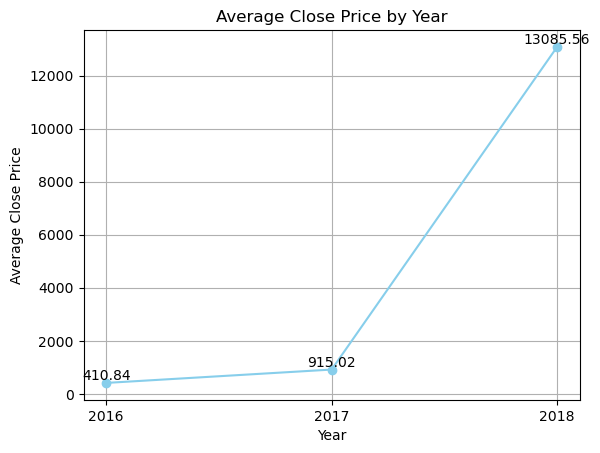

In [170]:
# Average closing price
average_close_by_year = data.groupby('year')['Close'].mean().reset_index()

plt.plot(average_close_by_year['year'], average_close_by_year['Close'], marker='o', color='skyblue', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.title('Average Close Price by Year')
plt.grid(True)

plt.xticks(average_close_by_year['year'])

for idx, val in enumerate(average_close_by_year['Close']):
    plt.text(average_close_by_year['year'][idx], val, f'{val:.2f}', ha='center', va='bottom') 

plt.savefig('../assets/images/figures/average_close_by_year.png', format='png', dpi=300) 

plt.show()

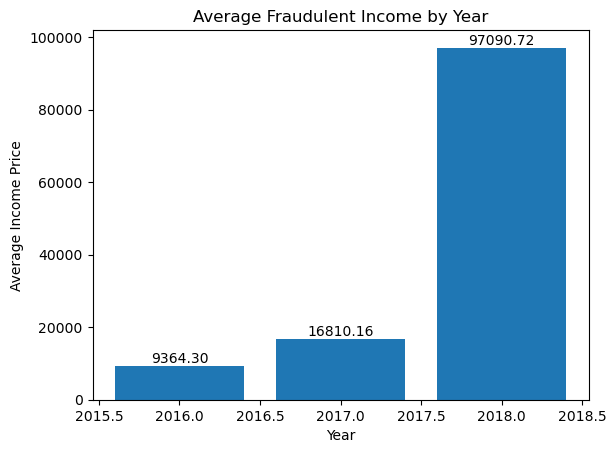

In [212]:
# Average Income per Year
average_income_by_year = data.groupby('year')['income'].mean().reset_index()

average_income_by_year['income_usd'] = ((average_income_by_year['income'] / 100000000) * average_close_by_year['Close']).round(2)

average_income_by_year.drop('income', axis=1)

plt.bar(average_income_by_year['year'], average_income_by_year['income_usd'])

plt.xlabel('Year')
plt.ylabel('Average Income Price')
plt.title('Average Fraudulent Income by Year')

for idx, val in enumerate(average_income_by_year['income_usd']):
    plt.text(average_close_by_year['year'][idx], val, f'{val:.2f}', ha='center', va='bottom') 

plt.savefig('../assets/images/figures/average_income_by_year.png', format='png', dpi=300) 

plt.show()

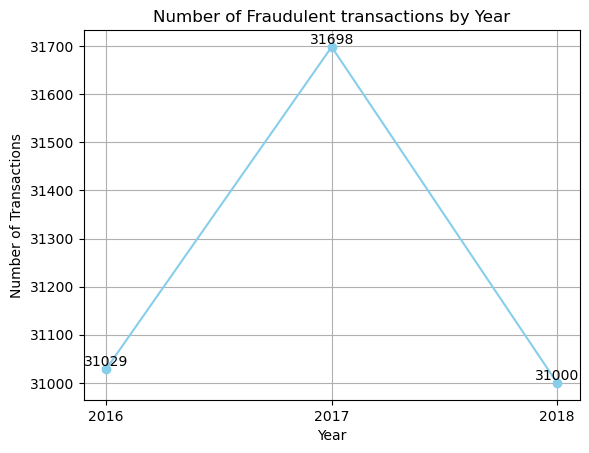

"\nplt.plot(average_close_by_year['year'], average_close_by_year['Close'], marker='o', color='skyblue', linestyle='-')\n\nplt.xlabel('Year')\nplt.ylabel('Average Close Price')\nplt.title('Average Close Price by Year')\nplt.grid(True)\n\nplt.xticks(average_close_by_year['year'])\n\nfor idx, val in enumerate(average_close_by_year['Close']):\n    plt.text(average_close_by_year['year'][idx], val, f'{val:.2f}', \n             ha='center', va='bottom') \n\nplt.savefig('../assets/images/figures/average_close_by_year.png', format='png', dpi=300) \n\nplt.show()\n"

In [220]:
# Total Fraud. Transactions by Year
count_transactions_by_year = data.groupby('year')['count'].count().reset_index()

plt.plot(count_transactions_by_year['year'], count_transactions_by_year['count'], marker='o', color='skyblue', linestyle='-')

plt.title('Number of Fraudulent transactions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(count_transactions_by_year['year'])

for idx, val in enumerate(count_transactions_by_year['count']):
    plt.text(count_transactions_by_year['year'][idx], val, f'{val}', ha='center', va='bottom')

plt.savefig('../assets/images/figures/count_of_transactions_by_year.png')

plt.show()